# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 5 Artificial Neurons ##

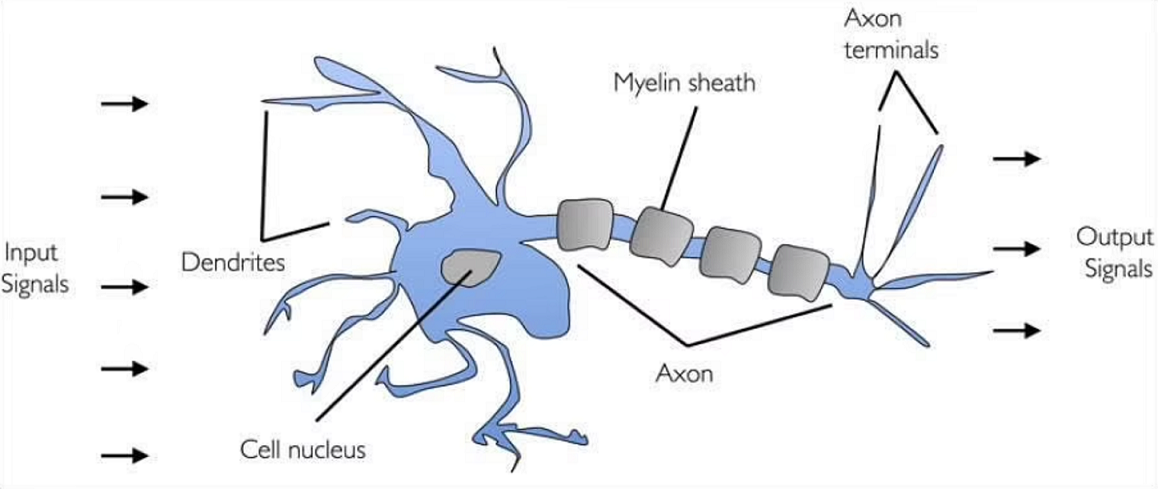


## **Review** ##
Before we start, let's have a quick recap of the lecture.

## __Artificial Neural Network (ANN)__ ##

The full name of ANN is Artificial Neural Network. An Artificial Neurons is a basic unit of ANN.

A biological neuron and an artificial neuron are similar in structure. Both take inputs and transform them into outputs.

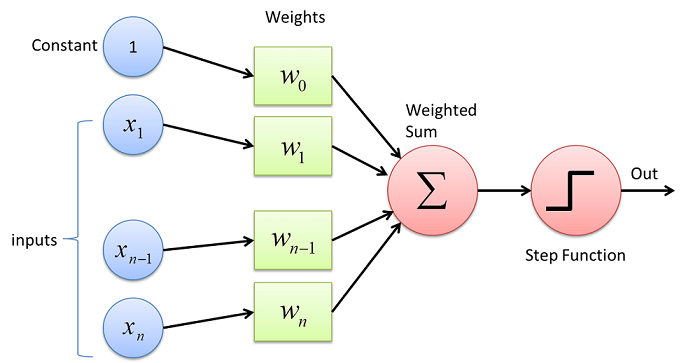



## __Linear Function and Activation Function__

In an artificial neuron, there are two functions. The linear function aggregates all inputs ($x_1, x_2, \ldots, x_n$) with the corresponding weights ($w_1, w_2, \ldots, w_n$) and applies bias ($\theta$).
>$Y(x_{1}, x_{2}, ...,x_{n}) = \sum_{i=1}^n(w_{i} \times x_{i}) + \theta$.

In this function, the $w_1, w_2, \ldots, w_n$, and $\theta$ are all trainable parameters, which will be updated during the training process.

After getting the value Y, an activation function, $f$, is used to determine the output. There are many different types of activation functions. Here we use 
>$output = f(Y) = 1 $  for  $Y>0$<br/>
>$output = f(Y) = 0 $  for  $Y\leq0$

for simplicity.



## __Weight Update__

After understanding how to obtain results for inputs using an artificial neuron, now, let's discuss why the artificial neuron is learnable.

As mentioned, the function has trainable parameters $w_1, w_2, \ldots, w_n$ and $\theta$. We will update these initialized trainable parameters as we go through the data samples in the dataset.

For each data sample in the dataset:
>Compute $f(Y(x_{1}, x_{2}, ...,x_{n}))$ <br/>
>Check if $f(Y)==T$, where $T$ is the true label for the data sample.<br/>
>If yes, $w_1, w_2, \ldots, w_n$, and $\theta$ stay unchanged.<br/>
>If not, $w_1, w_2, \ldots, w_n$, and $\theta$ will be updated according to the following rules such that the output of the artificial neuron for the new weights is closer to the true label.<br/>
>>1. $w_1, w_2, \ldots, w_n$ will be updated according to the value of input $x_1, x_2, \ldots, x_n$ and output difference $T-f(Y)$. <br>
$\Delta w_i=\eta (T-f(Y))\cdot x_i$
>>2. $\theta$ will be updated according to the value of the output difference $T-f(Y)$. <br>
$\Delta \theta=\eta (T-f(Y))$

The number that controls how much the weights change is called the $learning$ $rate$, denoted as $\eta$.

The number of times we go through all training data samples is called $epochs$.

The chosen $learning$ $rate$ and $maximum$ $epochs$ are important as they influence the final performance and training time.





## __Stopping Rules__

Now we have an idea of how to start the training process.

But when should we stop? How do we know the artificial neuron is ready?

Here are several rules we can follow:


*   Stop when reaching $maximum$ $training$ $time$. We can set a time limit for the training process.
*   Stop when reaching $maximum$ $epochs$. We can set the maximum number of rounds the training process can run.
*   Stop when the $error$ is low enough. We can check the average error after each epoch. If the error is below a certain threshold, stop the training process.
*   Stop when $accuracy$ is high enough. Similar to the above, we can count the accuracy level after each epoch. If the accuracy exceeds a certain threshold, stop the training process.
*   Stop when $weights$ do not update or update very little. We can check the change of weights during each epoch. If the change is minimal, stop the training process.

The purpose of these stopping rules is to avoid wasting resources and time on minimal improvements.

## __Limitations__

As a simple binary classification model, the artificial neuron has its drawbacks and limitations.

>The artificial neuron is not suitable for non-linear problems.

The artificial neuron acts like a straight line in multi-dimensional space to separate the data samples by label.

If the line cannot separate the data samples, then a simple artificial neuron cannot classify them. However, we can transform the non-linear problem into a linear problem, such as using a polynomial transformation.

>It is easily influenced by data distribution.

As a binary classifier, the simple artificial neuron suffers from data imbalance and insufficient data.

These situations can cause the artificial neuron to learn incorrect classification rules, leading to results such as __all 0s__ or __all 1s__.

## __Examples__

The following shows examples of how the artificial neuron model is used to classify different datasets. Perceptron is an artificial neuron with a binary step activation function.
 

__Normal 2-class data__

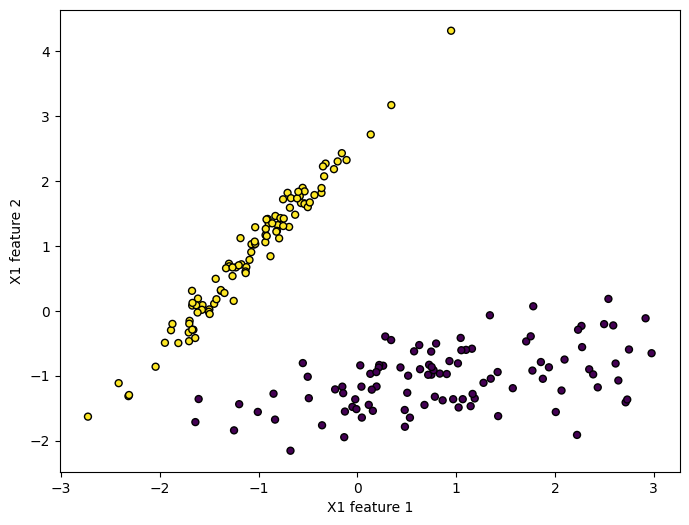

In [72]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Traditional 2-class data
X1, y1 = datasets.make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)

# Plot the points in the dataset
plt.figure(figsize=(8,6))
plt.scatter(X1[:,0],X1[:,1],marker='o',c=y1,s=25,edgecolors="k")
plt.xlabel("X1 feature 1")
plt.ylabel("X1 feature 2")
plt.show()

In [73]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X1
output=y1
model=Perceptron()
model.fit(input,output)

y_pred = model.predict(X1)
accuracy = accuracy_score(y1, y_pred)
f1 = f1_score(y1, y_pred)
print(f"Accuracy: {accuracy * 100}%\nF1 Score: {f1 * 100:.1f}%")

Accuracy: 100.0%
F1 Score: 100.0%


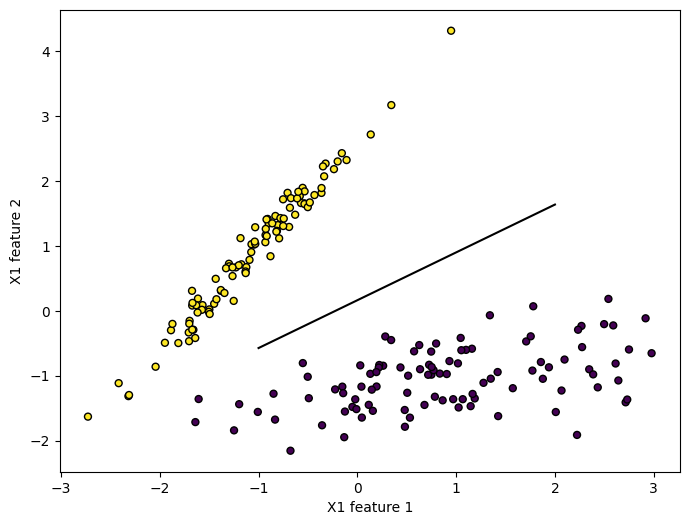

In [74]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(X1[:,0],X1[:,1],marker='o',c=y1,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
plt.xlabel("X1 feature 1")
plt.ylabel("X1 feature 2")
plt.show()

__Circle 2-class data__

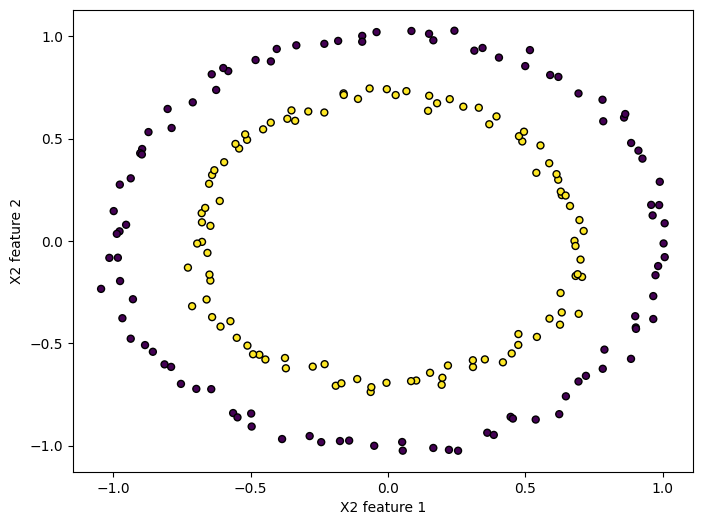

In [75]:
# Circle 2-class data
X2, y2 = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0],X2[:,1],marker='o',c=y2,s=25,edgecolors="k")
plt.xlabel("X2 feature 1")
plt.ylabel("X2 feature 2")
plt.show()

In [76]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X2
output=y2
model2=Perceptron()
model2.fit(input,output)

y_pred = model.predict(X2)
accuracy = accuracy_score(y2, y_pred)
f1 = f1_score(y2, y_pred)
print(f"Accuracy: {accuracy * 100}%\nF1 Score: {f1 * 100:.1f}%")

Accuracy: 49.5%
F1 Score: 46.6%


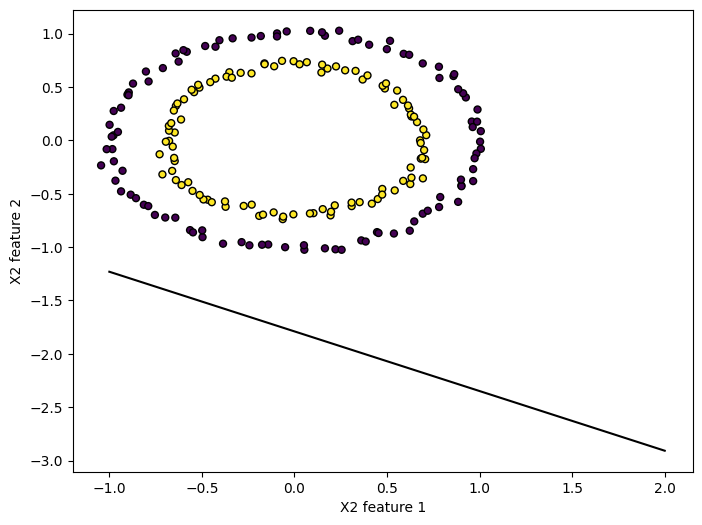

In [77]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model2.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(X2[:,0],X2[:,1],marker='o',c=y2,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
plt.xlabel("X2 feature 1")
plt.ylabel("X2 feature 2")
plt.show()

__Imbalance 2-class data__

4
196


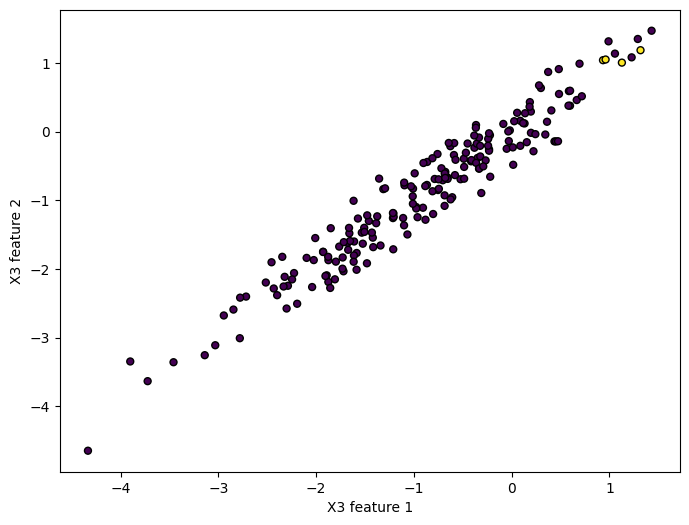

In [90]:
# Imbalance 2-class data
X3, y3 = datasets.make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.98]
)

print(sum(y3==1))
print(sum(y3==0))
# Plot the points in data
plt.figure(figsize=(8, 6))
plt.scatter(X3[:,0],X3[:,1],marker='o',c=y3,s=25,edgecolors="k")
plt.xlabel("X3 feature 1")
plt.ylabel("X3 feature 2")
plt.show()

In [91]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X3
output=y3
model3=Perceptron()
model3.fit(input,output)

y_pred = model.predict(X3)
accuracy = accuracy_score(y3, y_pred)
f1 = f1_score(y3, y_pred)
print(f"Accuracy: {accuracy * 100}%\nF1 Score: {f1 * 100:.1f}%")

Accuracy: 86.0%
F1 Score: 22.2%


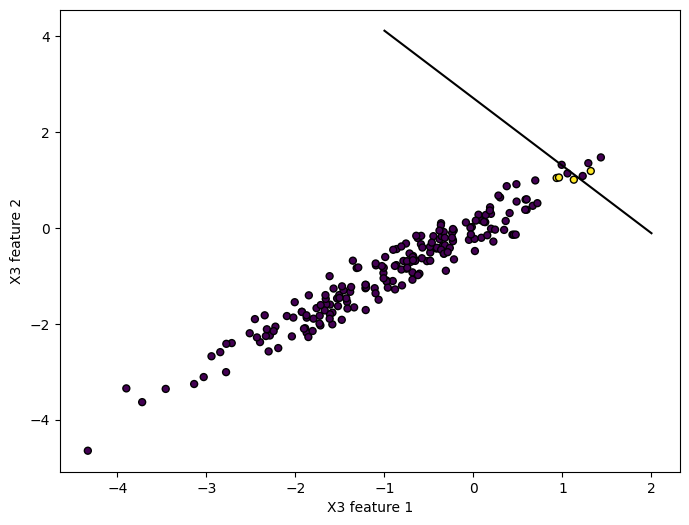

In [92]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model3.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model3.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.scatter(X3[:,0],X3[:,1],marker='o',c=y3,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
plt.xlabel("X3 feature 1")
plt.ylabel("X3 feature 2")
plt.show()